In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Tema 2: branje besedilnih datotek, delo z znakovnimi nizi in grafi 

Iz portala podatki.gov.si snamemo datoteko s podatki števcev prometa kolesarjev _`kolesarjidnevnipromet2023.csv`_ in jo shranimo v mapo, kjer se nahaja jupyter notebook s katerim bomo odpirali datoteko.

Naslov: 
https://podatki.gov.si/dataset/74b72bad-6ca2-4722-b058-bc1054d6f628/resource/70c761e1-85be-4c7f-90d2-f50af599a267/download/kolesarjidnevnipromet2023.csv

Kaj bomo naredili?
- preberemo vsebino datoteke in jo izpišemo na zaslon
- prebrane vrednosti števcev za Predor Valeta, Žusterno in Škofije prepišemo v sezname
- v izhodno datoteko zapišemo podatke o števčnem stanju za vse dni avgusta za lokacijo Žusterna 
- narišemo stolpični graf stanja števcev po dnevih za vse tri kraje
- na eno sliko narišemo tri ločene stolpične grafe, za vsak kraj posebej
- za vsak kraj poiščemo dan z največjim stanjem števca
- za vsak kraj prikažemo graf za mesec z največjim prometom

Kaj potrebujemo za izvedbo naloge?
- branje besedilnih datotek
- delo z besedilnimi nizi (stringi)
- delo s seznami
- zapisovanje v besedilne datoteke
- uporaba knjižnice za risanje grafov


## branje in izpis vsebine besedilne datoteke

Da bi prebrali vsebino besedilne datoteke je potrebno datoteko odpreti za branje. Dateoteko odpremo s funkcijo `open()`, ki vrne podatkovno strukturo, oz. objekt s katerim dostopamo do podatkov. Ta objekt shranimo v spremenljivko, ki predstavlja vsebino datoteke.

Zapomnimo si:
>Besedilne datoteke vedno beremo po vrsticah. \
>Branje datoteke vedno poteka po vrsti od prve vrstice in samo naprej. \
>Že prebranih vrstic ne moremo še enkrat prebrati.

Za odpiranje datoteke je koristno uporabiti `with` blok, ker v tem primeru Python sam poskrbi za zapiranje datoteke, ko je več ne potrebujemo. Spremenljivka, ki predstavlja vsebino datoteke (v primeru spordaj je to spremenljivka `stevci`), bo obstajala le znotraj bloka `with`.

Objekt za dostop do podatkov je _iterator_. To pomeni, da ga lahko uporabimo kot vir podatkov v zanki `for`, podobno kot uporabljamo sezname ali funkcijo `range()`. Ob vsakem prehodu zanke vrne eno vrstico in si zapomni trenutno pozicijo. 

V zanki izpišemo vsebino datoteke (break prekine izpis po prvi vrstici, če želiš izpisati vse vrstice, odstrani break, da se zanka ne prekine):

In [4]:
with open('kolesarjidnevnipromet2023.csv', encoding='cp1250') as stevci:
    for vrstica in stevci:
        print(vrstica, end='')
        break

;Skupno število kolesarjev v dnevu na števnem mestu;;;;;;;;;;;;;;;;;;;;;;


## prepis podatkov v sezname
Ob pregledu vsebine besedilne datoteke ugotovimo, da se v prvi vrstici nahaja naslov, v drugi vrstici pa so našteta imena stolpcev.

Ugotovimo, da so podatki za števna mesta, ki jih želimo obravnavati navedeni v naslednjih stolpcih (stolpce štejemo od 0 naprej):
* predor Valeta - stolpec 3
* Žusterna - stolpec 5
* Škofije - stolpec 12

Zapis podatkov v vseh vrsticah je enak in sledi naslednji shemi:
```
 8.01.2023;3;2;51;21;311;10;7;;15;18;;33;;;;;;;;47;;9;
```

### delo z znakovnim nizom (vrstica)
Besedilne datoteke beremo po vrsticah. Če želimo uporabiti podatke iz 'stolpcev' 1, 4, 6 in 13, moramo vrstico razcepiti. 

Za delo z besedilnimi nizi uporabimo metode (funkcije) podatkovne strukture `str` (string). Spremenljivke podatkovnega tipa `str` "znajo" delati s svojo vsebino. Te funkcije so "vgrajene" v spremenljivko in do njih dostopamo s piko.

Za razcep vrstice na stolpce bomo uporabili naslednji funkciji:
- `strip()`: funkcija na začetku in na koncu niza zbriše izbrane znake (privzeto ' ' in '\n')
- `split()`: funkcija razcepi niz in vrne seznam vseh delov

Najprej bomo vrstico očistili nepotrebnih znakov na začetku in na koncu vrstice (npr. odstranili bomo znak za preskok v novo vrstico).

In [24]:
vrstica = '8.01.2023;3;2;51;21;311;10;7;;15;18;;33;;;;;;;;47;;9;\n'
print(vrstica)
print(vrstica)

vrstica = vrstica.strip()
print(vrstica)
print(vrstica)

8.01.2023;3;2;51;21;311;10;7;;15;18;;33;;;;;;;;47;;9;

8.01.2023;3;2;51;21;311;10;7;;15;18;;33;;;;;;;;47;;9;

8.01.2023;3;2;51;21;311;10;7;;15;18;;33;;;;;;;;47;;9;
8.01.2023;3;2;51;21;311;10;7;;15;18;;33;;;;;;;;47;;9;


#### indeksiranje in rezanje

Iz besedilnega niza lahko pridobimo podniz z indeksom posamezne črke in z rezanjem (slicing).

```
vrstica[št.črke] - vrne posamezno črko
vrstica[od:do:korak] - vrne podniz s pričetkom pri črki od, koncem PRED črko do in vrne samo vsako 'korak' črko
```
Tako bi lahko iz vrstice pridobili posamične vrednosti.

In [21]:
podpicje = vrstica[11]
print(podpicje)

#od znaka na poziciji 9 do znaka na poziciji 14 (en manj kot zapišemo!) 
#vzamemo vsaki drugi znak
nekaj = vrstica[9:15:2]
print(nekaj)

datum = vrstica[0:9]
print(datum)

valeta = vrstica[14:16]
print(valeta)

;
;;;
8.01.2023
51


V primeru, ko želimo uporabiti podatke iz stolpcev 0, 3, 5, in 12 sicer poznamo številke "stolpcev" katerih vrednosti potrebujemo, vendar se ti stolpci v vsaki vrstici pričenjajo na različnih pozicijah, kar je odvisno od velikosti številk v predhodnih stolpcih. Zato vseh vrstic z indeksiranjem inrezanjem ne moremo obdelati na enak način. 

Boljši pristop bi bil, če bi vrstico razrezali na mestih, kjer se nahaja znak, ki ločuje podatke med seboj. V našem primeru je to podpičje.

Funkcija `split()` vrne seznam vrednosti iz besedilnega niza, pri tem pa niz razcepi na mestih kjer se nahaja izbrani ločilni znak:

In [7]:
podatki = vrstica.split(';')
print(podatki)

print(podatki[0])
print(podatki[3])

['8.01.2023', '3', '2', '51', '21', '311', '10', '7', '', '15', '18', '', '33', '', '', '', '', '', '', '', '47', '', '9', '']
8.01.2023
51


#### dodajanje elementa v seznam

Ko bomo vrstico prebrali, očistili in razcepili na posamezne podatke, moramo izbrane podatke tudi nekam shraniti, sicer bomo s prehodom na novo vrstico obstoječe podatke "pozabili".

Števčna stanja za vsak izbrani stolpec bomo shranjevali v sezname.

Da bi podatek dodali v seznam uporabimo funkcijo `append()`.

In [8]:
sez = []
sez.append(51)
sez.append(66)
sez

[51, 66]

#### polnjenje seznamov s podatki iz izbranih stolpcev
Če želimo prebrane podatke iz datoteke shraniti v spremenljivke, lahko v ta namen uporabimo podatkovno strukturo seznam. Kako bomo podatke razdelili v sezname je odvisno od potreb in od primera uporabe. V našem primeru bomo v sezname prepisali izbrane stolpce datoteke.

Pri nalaganju podatkov bomo naleteli še na nekatere težave. Npr. v določenih vrsticah podatki o števčnem stanju manjkajo, na teh mestih bomo v seznam vpisali vrednost 0. Podatki večji od 1000 pa so zapisani s piko, ki predstavlja ločilo tisočic (torej 1.000). Ker pika v Pythonu vedno predstavlja decimalno ločilo, bomo pri branju morali iz števil odstraniti tudi pike.  

Nalaganje podatkov bo potekalo po naslednjem algoritmu:
```
odpremo datoteko
preskočimo dve vrstici
pripravimo prazne sezname
za vsako vrstico
    razcepimo vrstico na stolpce
    dodamo stolpec 0 v seznam datumov
    dodamo stolpec 3 v seznam valeta
    dodamo stolpec 5 v seznam zusterna
    dodamo stolpec 12 v seznam skofije
```

Pri polnjenju seznamov bomo potrebovali:
- funkcija `strip()` - počisti znake, ki jih ne potrebujemo, na začetku in na koncu besedilnega niza
- funkcija `split()` - razcepi niz na seznam elementov glede na izbrano ločilo
- funkcija `replace()` - zamenja znak ali niz znakov v besedilnem nizu


In [102]:
with open('kolesarjidnevnipromet2023.csv', encoding='cp1250') as stevci:
    stevci.readline()
    stevci.readline()
    datumi = []
    valeta = []
    zusterna = []
    skofije = []
    for dan in stevci:
        podatki = dan.strip().split(';')
        datumi.append(podatki[0])
        if podatki[3] != '':
            valeta.append(int(podatki[3].replace('.','')))
        else:
            valeta.append(0)
        if podatki[5] != '':
            #brez if bo tu napaka, ker za nekatere dni podatkov ni => int('')
            #nato bo napaka še zaradi številke večje od 1000, ki je zapisana s piko 1.234 => replace()
            zusterna.append(int(podatki[5].replace('.','')))  
        else:
            zusterna.append(0)
        if podatki[12] != '':
            skofije.append(int(podatki[12].replace('.','')))
        else:
            skofije.append(0)


## zapis podatkov v izhodno datoteko

Podatke smo naložili v štiri sezname, in sicer imamo seznam datumov ter tri sezname števčnih stanj za Valeto, Žusterno in Škofije.

Pomembno je vedeti, da ima števčno stanje v seznamu `zusterna` enak položaj (indeks), kot ima položaj ustrezen datum v seznamu datumov. Enako velja za ostala dva seznama števčnih stanj.

Če želimo podatke shraniti v besedilno datoteko, ki naj ima vsebino:

```
datum;Valeta;Žusterna;Škofije
1.01.2023;64;463;75
...
```
bomo iz vseh seznamov jemali istoležne podatke (elemente z istim indeksom) in iz njih sestavili vrstico za zapis v izhodno datoteko.

V nadaljevanju bomo na dva načina zapisali izhodno datoteko, ki bo vsebovala samo podatke o datumu in števčnih stanjih za Žusterno. Analogno bi lahk o primer razširili na vse tri sezname števčnih stanj.

>NE POZABI: \
>Pri zapisovanju v datoteko ne pozabi določiti, da datoteko odpiraš za zapisovanje: 
>- 'w' pomeni, da ustvarimo novo prazno datoteko 
>- 'a' pomeni, da dodajamo na konec obstoječe datoteke
>
>Funkcija za zapisovanje`write()` na koncu vrstice ne dodaja znaka za konec vrstice, zato ga moramo sami dodati. Znak za preskok v novo vrsto zapišemo kot \n. 

Dva načina uparjanja istoležnih elementov seznamov:
- `enumerate`: funkcija vrne zaporedno številko elementa in element seznama
- `zip`: funkcija tvori n-terice (tuple) istoležnih elementov seznamov

In [94]:
with open('kolesaji_zusterna.csv', 'w', encoding='cp1250') as izhodna:
    izhodna.write('datum;števec\n')
    for i, datum in enumerate(datumi):
        dmy = datum.split('.')
        if dmy[1] == '08':
            izhodna.write(f'{datum};{zusterna[i]}\n')


In [80]:
with open('kolesaji_zusterna.csv', 'w', encoding='cp1250') as izhodna:
    izhodna.write('datum;števec\n')
    for datum, stanje in zip(datumi, zusterna):
        dmy = datum.split('.')
        if dmy[1] == '08':
            izhodna.write(f'{datum};{stanje}\n')

## risanje grafa

Za risanje grafov bomo uporabili knjižnico `matplotlib` (za pomoč glej https://matplotlib.org).

Pri delu s knjižnico si običajno pomagamo s skrajšanimi navodili:  https://matplotlib.org/cheatsheets/, kjer na enem mestu najdemo številne funkcije in nastavitve.

Pri uporabi `matplotlib` najprej ustvarimo sliko in nabor grafov, ki jih bomo prikazali v sliki. Nato v posamezne grafe dodajamo krivulje, stolpce ali točke, ki jih ustvarimo iz seznamov, ki vsebujejo vrednosti za x in y koordinate (ali druge podatke, če ne uporabljamo kartezičnega koordinatnega sistema).

Sliko in grafe ustvarimo:

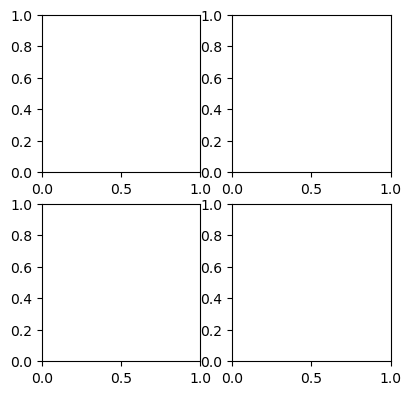

In [81]:
fig, ax = plt.subplots(2,2, figsize=(4.5,4.5))

Funkcija `subplots` ustvari tako objekt Figure, kot nabor Axes (grafi). V primeru se celotna slika shrani v spremenljivko fig in babor grafov v spremenljivko ax.

Posebnost je, da ax glede na podane zahteve glede števila grafov spreminja strukturo.
- Če ne določimo števila grafov, ax vsebuje en sam graf.
- Če določimo več grafov v eni vrstici, ax vsebuje enodimenzinalen seznam grafov.
- Če določimo več grafov v enem stolpcu, ax vsebuje enodimenzinalen seznam grafov.
- Če določimo več vrstic grafov, ki vsaka vsebuje več grafov, ax vrebuje dvodimenzinalen seznam.

Primer:
``` Python
fig, ax = plt.subplots(st_vrstic, st_stolpcev)
```

Če je ax polje (eno ali dvodimenzinalno), ga lahko razpakiramo v posamične spremenljivke, za lažje nadalnje delo. Nato pa v posamične grafe rišemo podatke. 

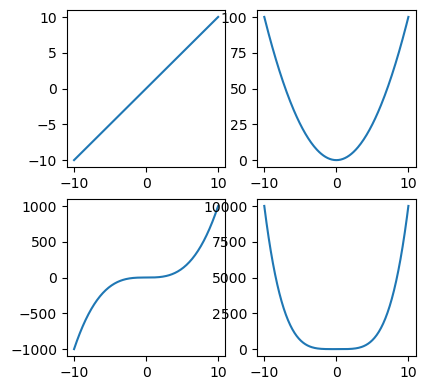

In [87]:
fig, ax = plt.subplots(2,2, figsize=(4.5,4.5))
levo_zgoraj = ax[0,0]
desno_zgoraj = ax[0,1]
levo_spodaj = ax[1,0]
desno_spodaj = ax[1,1]

x = np.linspace(-10, 10, 201)
levo_zgoraj.plot(x, x)
desno_zgoraj.plot(x, x**2)
levo_spodaj.plot(x, x**3)
desno_spodaj.plot(x, x**4)

### stolpični graf števčnih stanj

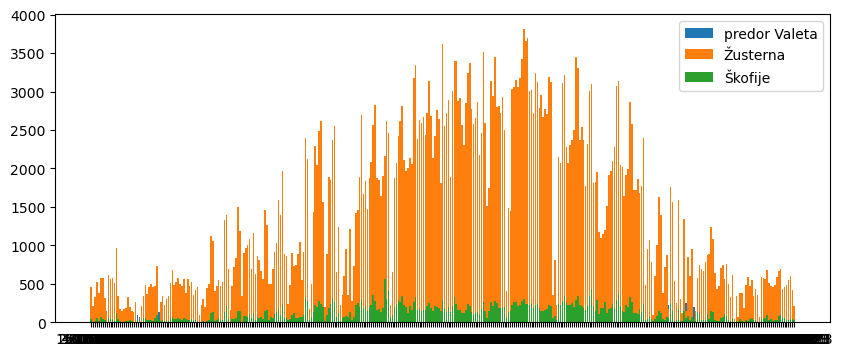

In [96]:
fig, ax = plt.subplots(figsize=(10,4))

ax.bar(datumi, valeta, label='predor Valeta')
ax.bar(datumi, zusterna, label='Žusterna')
ax.bar(datumi, skofije, label='Škofije')
ax.legend()

### opremljanje grafa

Graf lahko opremimo z naslovi, prilagajamo lahko oznake na oseh in določamo številne druge nastavitve. 

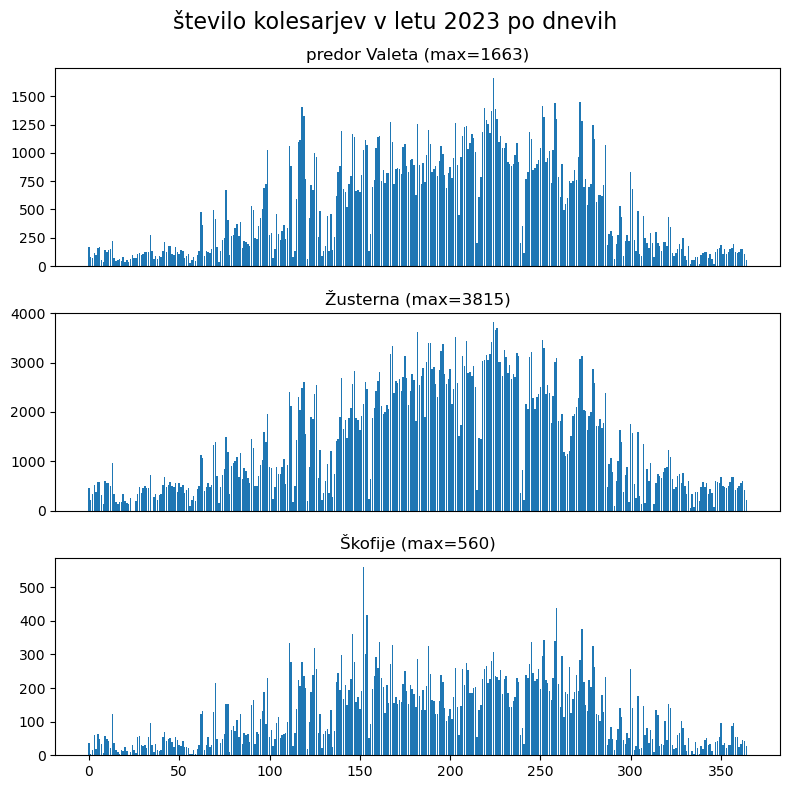

In [84]:
fig, ax = plt.subplots(3, 1, figsize=(8,8))

v, z, s = ax  # dodeljevanje vrednosti večim spremenljivkam

v.bar(datumi, valeta, label='predor Valeta')
#v.plot(datumi, np.ones(len(datumi))*(sum(valeta)/len(valeta)), color='r')
v.set_title(f'predor Valeta (max={max(valeta)})')
v.set_xticks([])
z.bar(datumi, zusterna, label='Žusterna')
z.set_title(f'Žusterna (max={max(zusterna)})')
z.set_xticks([])
s.bar(range(0,365), skofije, label='Škofije')
s.set_title(f'Škofije (max={max(skofije)})')

fig.suptitle('število kolesarjev v letu 2023 po dnevih', fontsize=16)
fig.tight_layout()

## dnevi z navišjim prometom

In [94]:
stevci = {'Valeta': valeta,
          'Žusterna': zusterna,
          'Škofije': skofije}

for ime, stevec in stevci.items():
    print(f'{ime}')
    print('----------------')
    print(f'največ prehodov na dan je bilo dne {datumi[stevec.index(max(stevec))]} in znaša {max(stevec)}')
    print(f'povprečno stanje števca na dan v letu 2023: {sum(stevec)/len(stevec):.2f}')
    print()


Valeta
----------------
največ prehodov na dan je bilo dne 13.08.2023 in znaša 1663
povprečno stanje števca na dan v letu 2023: 514.06

Žusterna
----------------
največ prehodov na dan je bilo dne 13.08.2023 in znaša 3815
povprečno stanje števca na dan v letu 2023: 1388.38

Škofije
----------------
največ prehodov na dan je bilo dne 2.06.2023 in znaša 560
povprečno stanje števca na dan v letu 2023: 123.73



## prikaz stanj za najbolj prometni mesec

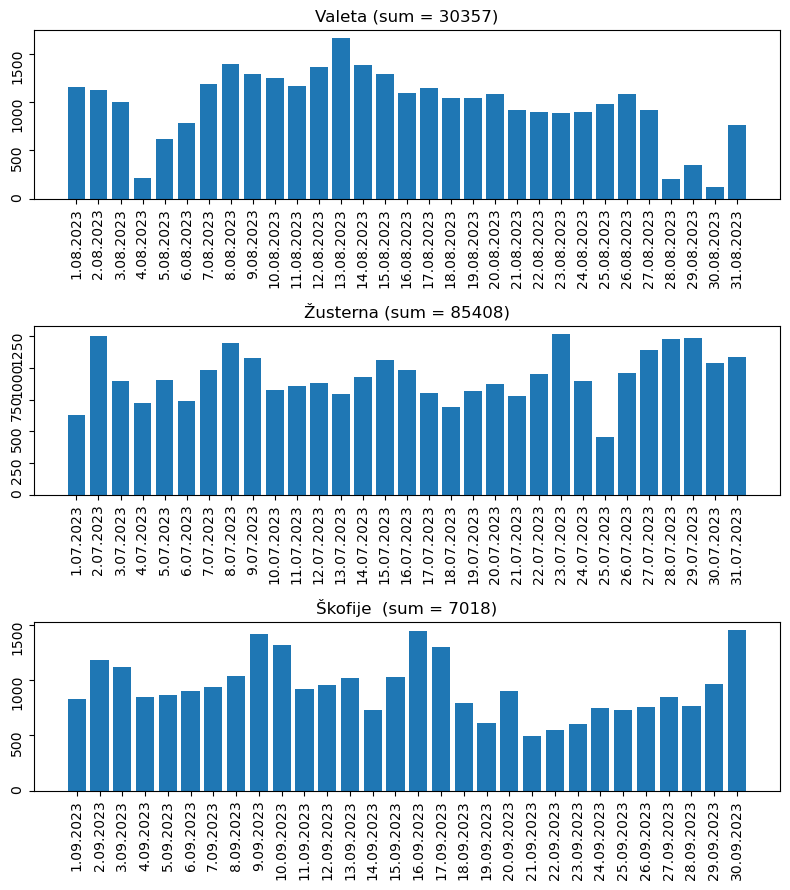

In [104]:
#primer razpona za en mesec
#print(datumi[0:31])

#ročno določanje razponov
razponi = [
 (0, 30),
 (31, 58),
 (59, 89),
 (90, 119),
 (120, 150),
 (151, 180),
 (181, 211),
 (212, 242),
 (243, 272),
 (273, 303),
 (304, 333),
 (334, 364)]

#določimo razpone indeksov za računanje prometa
leto = 2023
mesec_valeta, mesec_zusterna, mesec_skofije = [], [], []

fig, ax = plt.subplots(3,1, figsize=(8, 9))
g1, g2, g3 = ax

#seštevki po mesecih
for r in razponi:
    mesec_valeta.append(sum(valeta[r[0]:r[1]+1]))
    mesec_zusterna.append(sum(zusterna[r[0]:r[1]+1]))
    mesec_skofije.append(sum(skofije[r[0]:r[1]+1]))

#Valeta
max_promet = max(mesec_valeta)
idx_max_promet = mesec_valeta.index(max_promet)
od = razponi[idx_max_promet][0]
do = razponi[idx_max_promet][1] + 1

g1.bar(datumi[od:do], valeta[od:do])
g1.tick_params(labelrotation=90)
g1.set_title(f'Valeta (sum = {max_promet})')

#žusterna
max_promet = max(mesec_zusterna)
idx_max_promet = mesec_zusterna.index(max_promet)
od = razponi[idx_max_promet][0]
do = razponi[idx_max_promet][1] + 1

g2.bar(datumi[od:do], valeta[od:do])
g2.tick_params(labelrotation=90)
g2.set_title(f'Žusterna (sum = {max_promet})')

#škofije
max_promet = max(mesec_skofije)
idx_max_promet = mesec_skofije.index(max_promet)
od = razponi[idx_max_promet][0]
do = razponi[idx_max_promet][1] + 1

g3.bar(datumi[od:do], valeta[od:do])
g3.tick_params(labelrotation=90)
g3.set_title(f'Škofije  (sum = {max_promet})')

fig.tight_layout()


### malo za šalo

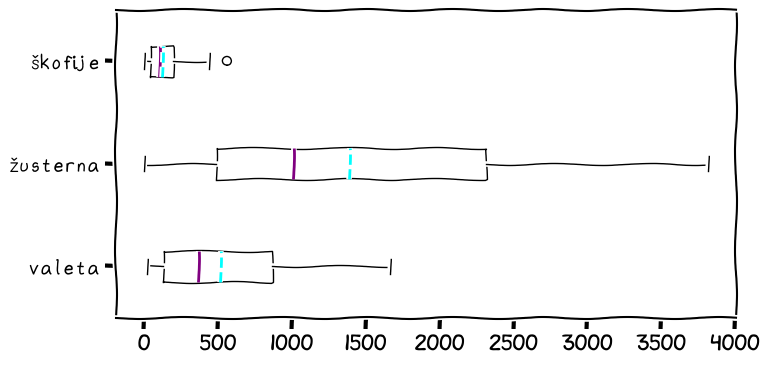

In [16]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(8,4))

    ax.boxplot((valeta, zusterna, skofije), vert=False, showmeans=True, 
               meanline=True,
               tick_labels=('valeta', 'žusterna', 'škofije'), 
               patch_artist=False,
               medianprops={'linewidth': 2, 'color': 'purple'},
               meanprops={'linewidth': 2, 'color': 'cyan'});

## Branje podatkov iz datoteke s knjižnico Pandas

In [3]:
import pandas as pd

In [250]:
df = pd.read_csv('kolesarjidnevnipromet2023.csv', 
                 encoding='cp1250', 
                 skiprows=1, 
                 sep=';',
                 decimal=',',
                 thousands='.',
                 converters={'Datum': str})
df.columns

Index(['Datum', '3001  Rateče', '3002 Gozd Martuljek', '3003 Predor Valeta',
       '3004 Rajnkovec', '3005 Žusterna', '3006 Solkan', '3007 Dravograd',
       '3008 Ljutomer', '3009 Ajdovščina', '3010 Bevče', '3011 Modrej',
       '3012 Škofije', '3013 Grahovo', '3014 Dravograd (Meža)',
       '3015 Mozirje (Ljubija)', '3016 Huda luknja', '3017 Limbuš',
       '3019 Podčetrtek', '3020 Rogaška Slatina', '3021 Sečoveljske soline',
       '3022 Celje, Parkirišče P+R', '3023 Velenje (pri Gorenju)',
       '3024 Zagorje (Rogličev most)'],
      dtype='object')

In [252]:
df_izbrani = df[['Datum', '3003 Predor Valeta', '3005 Žusterna', '3012 Škofije']].copy()

In [254]:
df_izbrani.columns = ['Datum', 'Valeta', 'Žusterna', 'Škofije']

In [256]:
df_izbrani.dtypes

Datum        object
Valeta        int64
Žusterna    float64
Škofije       int64
dtype: object

In [258]:
df_izbrani['mesec'] = df_izbrani['Datum'].astype(str)

In [260]:
df_izbrani['mesec'] = df_izbrani['mesec'].str[-7:-5] 

In [262]:
df_izbrani['dan'] = df_izbrani['Datum'].astype(str)
df_izbrani['dan'] = df_izbrani['dan'].str[-10:-8]

In [279]:
df_izbrani.describe()

,Valeta,Žusterna,Škofije
count,365.000000,361.000000,365.000000
mean,514.063014,1403.767313,123.728767
std,415.000475,1033.696800,97.697196
min,17.000000,48.000000,2.000000
25%,130.000000,492.000000,37.000000
50%,367.000000,1040.000000,102.000000
75%,864.000000,2365.000000,198.000000
max,1663.000000,3815.000000,560.000000


In [266]:
df_izbrani[df_izbrani['mesec']=='06']

,Datum,Valeta,Žusterna,Škofije,mesec,dan
151,1.06.2023,801,1908.0,191,06,1
152,2.06.2023,1023,2158.0,560,06,2
153,3.06.2023,1113,2615.0,301,06,3
154,4.06.2023,1066,2462.0,417,06,4
155,5.06.2023,130,230.0,50,06,5
156,6.06.2023,284,650.0,92,06,6
157,7.06.2023,697,1872.0,197,06,7
158,8.06.2023,757,2072.0,236,06,8
159,9.06.2023,1043,2427.0,293,06,9
160,10.06.2023,1136,2620.0,259,06,10


<Axes: >

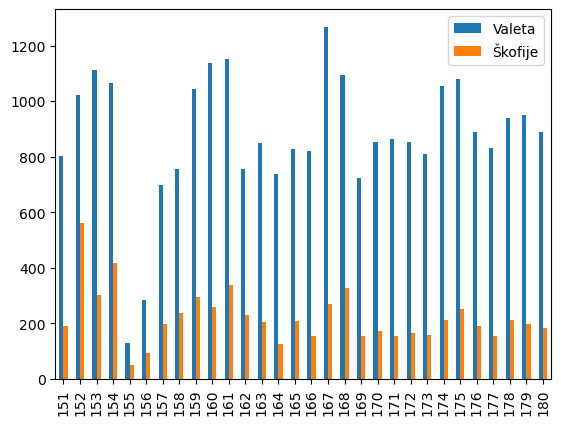

In [274]:
df_izbrani.loc[df_izbrani['mesec']=='06', ['Valeta', 'Škofije']].plot.bar()  

<Axes: xlabel='mesec'>

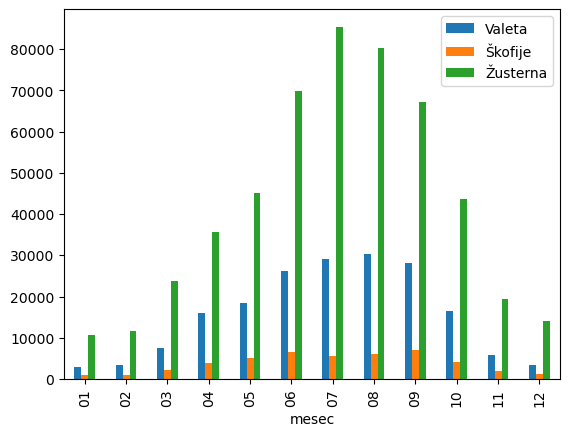

In [270]:
df_po_mesecih = df_izbrani[['mesec', 'Valeta', 'Škofije', 'Žusterna']].groupby(['mesec']).sum()
df_po_mesecih.plot.bar()

In [284]:
df_izbrani.to_csv('kolesarji.csv', encoding='cp1250', sep=';')

## za doma

#### prometne obremenitve - filtriraj podatke

Iz portala Odprti podatki Slovenije snamite datoteko s podatki povprečnega letnega dnevnega prometa (PLDP) državnega cestnega omrežja za leto 2023.

Datoteko najdete na naslovu: https://podatki.gov.si/dataset/86c39f5b-4a57-4976-a6ac-987df32c84b1/resource/25d69bac-c21d-4243-a8ed-8be49aa93f9f/download/pldp2023noo.csv

Napišite program, ki iz vhodne datoteke za vse navedene odseke prebere podatke o povprečnem letnem dnevnem prometu. Ustvarite novo izhodno datoteko v katero zapišite samo podatke iz stolpcev `Kat. ceste`, `Štev. ceste`,	`Štev. odseka`,	`Prometni odsek` ter `Vsa vozila`.

Glede na to, da so vrednosti v stolpcu `Vsa vozila` zapisane s piko kot ločilom, ki določa tisočice, v izhodno datoteko zapišite številko kot celo število brez pike.

Pri zapisu v izhodno datoteko upoštevajte še, da zapišete samo tiste vrstice, kjer je podatek v stolpcu Avtobusi večji od 150.


#### ustvari seznam razponov indeksov po mesecih
V prikazanem primeru smo uporabljali seznam `datumi`. Za prikaz prometa za en mesec, smo morali določiti od katerega in do katerega indeksa v seznamu se nahajajo podatki za določen mesec.  Napišite program, ki sestavi seznam `razponi`, ki smo ga v primeru fiksno podali in vsebuje pare `(začetni indeks meseca, končni indeks meseca)`. 

Namig: V seznamu datumi je potrebno poiskati indeks prvega in zadnjega dne za vsak mesec.

Pomoč: Za računanje z datumi lahko uporabite knjižnico `datetime`. V pomoč vam je lahko naslednji primer, v katerem poiščemo prvi in zadnji dan nekega meseca, ki ju nato zapišemo kot besedilni niz. Zadnji dan v mesecu poiščemo tako, da od prvega dne naslednjega meseca odštejemo en dan. Tako se nam ni potrebno ukvarjati s tem, koliko dni ima posamezen mesec.


In [80]:
import datetime as dt

en_dan = dt.timedelta(days=1)  # s funkcijo ustvarimo poljubno časovno obdobje (v dnevih, mesecih, letih...)

m, leto = 2, 2024
prvi = dt.date(day=1, month=m, year=leto)  # s funkcijo ustvarimo spremenljivko tipa Date za prvi dan v mesecu m 
zadnji = prvi - en_dan         # z datumi in časovnimi obdobji lahko računamo enako to z navadnimi števili

print(zadnji)                 # podatkovni tip Date se samodejno pretvori v string v ISO formatu

#mi potrebujemo datum zapisan kot 1.04.2024, zato ga ročno sestavimo
prvi_str = f'{prvi.day}.{zadnji.month:0>2}.{zadnji.year}'       # Datum ima lastnosti day, month in year,
zadnji_str = f'{zadnji.day}.{zadnji.month:0>2}.{zadnji.year}'   # ki jih lahko uporabite za sestavo stringa

print(prvi_str)
print(zadnji_str)

2024-01-31
1.01.2024
31.01.2024
